# Neural networks

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Data preprocessing

In [2]:
from sklearn import preprocessing
import numpy as np

In [3]:
features = np.array([[-100.1, 3240.10],
                     [-200.2, -234.1],
                     [5000.5, 150.1],
                     [6000.6, -125.1],
                     [9000.9, -673.1]])

In [4]:
scaler = preprocessing.StandardScaler()
features_standardized = scaler.fit_transform(features)

In [5]:
features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [6]:
print("Average:", round(features_standardized[:, 0].mean()))
print("Std:", round(features_standardized[:, 0].std()))

Average: 0
Std: 1


### Neural Network design

In [7]:
from keras import models
from keras import layers

In [8]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))
# 2 layers neural network for classification (1 output layer with sigmoid activator)

In [9]:
network.compile(
    loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

### Binary classificator training

In [10]:
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer

In [11]:
np.random.seed(0)

In [12]:
number_of_features = 1000

In [13]:
(data_train, target_train), (data_test, target_test), = imdb.load_data(num_words=number_of_features)
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [14]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))

In [15]:
network.compile(
    loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [16]:
history = network.fit(
    features_train,
    target_train,
    epochs=3,
    verbose=1,
    batch_size=100,
    validation_data=(features_test, target_test))

Epoch 1/3
250/250 [==============================] - 2s 5ms/step - loss: 0.5033 - accuracy: 0.7533 - val_loss: 0.3356 - val_accuracy: 0.8581
Epoch 2/3
250/250 [==============================] - 1s 2ms/step - loss: 0.3187 - accuracy: 0.8664 - val_loss: 0.3261 - val_accuracy: 0.8629
Epoch 3/3
250/250 [==============================] - 1s 2ms/step - loss: 0.3150 - accuracy: 0.8682 - val_loss: 0.3306 - val_accuracy: 0.8602


In [17]:
features_train.shape

(25000, 1000)

### Multiclass classificator training

In [18]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

In [19]:
np.random.seed(0)

In [20]:
number_of_features = 5000

In [21]:
data = reuters.load_data(num_words=number_of_features)
(data_train, target_vector_train), (data_test, target_vector_test) = data

In [22]:
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

In [23]:
network = models.Sequential()
network.add(layers.Dense(units=100, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=100, activation="relu"))
network.add(layers.Dense(units=46, activation="softmax"))

In [24]:
network.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

In [25]:
history = network.fit(
    features_train,
    target_train,
    epochs=3,
    verbose=1,
    batch_size=100,
    validation_data=(features_test, target_test))

Epoch 1/3
90/90 [==============================] - 2s 13ms/step - loss: 2.1406 - accuracy: 0.5597 - val_loss: 1.1356 - val_accuracy: 0.7404
Epoch 2/3
90/90 [==============================] - 1s 8ms/step - loss: 0.8338 - accuracy: 0.8157 - val_loss: 0.9327 - val_accuracy: 0.7805
Epoch 3/3
90/90 [==============================] - 1s 8ms/step - loss: 0.5299 - accuracy: 0.8865 - val_loss: 0.8727 - val_accuracy: 0.8023


In [26]:
target_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Regressor training

In [27]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [28]:
np.random.seed(0)

In [29]:
features, target = make_regression(n_samples=10_000,
                                   n_features=3,
                                   n_informative=3,
                                   n_targets=1,
                                   noise=0.0,
                                   random_state=0)

In [30]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33, random_state=0)

In [31]:
network = models.Sequential()
network.add(layers.Dense(units=32, activation="relu", input_shape=(features_train.shape[1],)))
network.add(layers.Dense(units=32, activation="relu"))
network.add(layers.Dense(units=1))

In [32]:
network.compile(
    loss="mse",
    optimizer="RMSprop",
    metrics=["mse"])

In [33]:
history = network.fit(features_train, target_train, epochs=10, verbose=1, batch_size=100, validation_data=(features_test, target_test))

Epoch 1/10
67/67 [==============================] - 1s 4ms/step - loss: 17523.9930 - mse: 17523.9933 - val_loss: 17481.3496 - val_mse: 17481.3496
Epoch 2/10
67/67 [==============================] - 0s 2ms/step - loss: 16866.5458 - mse: 16866.5458 - val_loss: 16045.1123 - val_mse: 16045.1123
Epoch 3/10
67/67 [==============================] - 0s 2ms/step - loss: 15181.8902 - mse: 15181.8891 - val_loss: 13691.3877 - val_mse: 13691.3877
Epoch 4/10
67/67 [==============================] - 0s 2ms/step - loss: 12580.5123 - mse: 12580.5122 - val_loss: 10560.5645 - val_mse: 10560.5645
Epoch 5/10
67/67 [==============================] - 0s 2ms/step - loss: 9159.5038 - mse: 9159.5038 - val_loss: 7036.9004 - val_mse: 7036.9004
Epoch 6/10
67/67 [==============================] - 0s 2ms/step - loss: 5623.5515 - mse: 5623.5515 - val_loss: 3847.7283 - val_mse: 3847.7283
Epoch 7/10
67/67 [==============================] - 0s 2ms/step - loss: 3169.3132 - mse: 3169.3132 - val_loss: 1755.9774 - val_mse: 

### Predictions

In [34]:
np.random.seed(0)

In [35]:
number_of_features = 10_000

In [36]:
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

In [37]:
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [38]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))

In [39]:
network.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

In [40]:
history = network.fit(features_train, target_train, epochs=3, verbose=1, batch_size=100, validation_data=(features_test, target_test))

Epoch 1/3
250/250 [==============================] - 3s 10ms/step - loss: 0.4478 - accuracy: 0.8089 - val_loss: 0.2878 - val_accuracy: 0.8848
Epoch 2/3
250/250 [==============================] - 2s 6ms/step - loss: 0.1979 - accuracy: 0.9235 - val_loss: 0.3080 - val_accuracy: 0.8781
Epoch 3/3
250/250 [==============================] - 2s 6ms/step - loss: 0.1528 - accuracy: 0.9449 - val_loss: 0.3175 - val_accuracy: 0.8772


In [41]:
predicted_target = network.predict(features_test)

In [42]:
predicted_target[0]

array([0.10805401], dtype=float32)

### Training history visualization

In [43]:
import matplotlib.pyplot as plt

In [44]:
np.random.seed(0)

In [45]:
number_of_features = 10_000

In [46]:
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

In [47]:
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [48]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))

In [49]:
network.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

In [50]:
history = network.fit(
    features_train,
    target_train,
    epochs=15,
    verbose=0,
    batch_size=1000,
    validation_data=(features_test, target_test))

In [51]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

In [52]:
epoch_count =  range(1, len(training_loss) + 1)

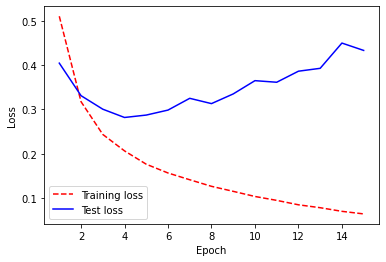

In [53]:
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

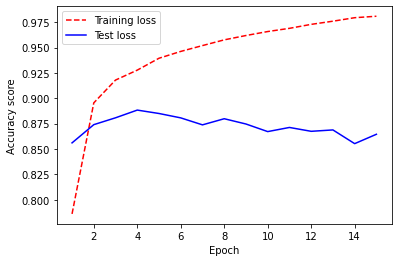

In [54]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy score")
plt.show()